<a href="https://colab.research.google.com/github/samvillasmith/EDA/blob/main/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3-Sigma Technique

The 3-sigma technique is a statistical method used to identify outliers in a dataset. It is based on the empirical rule, which states that for a normal distribution, approximately 99.7% of data falls within three standard deviations of the mean.

Here's how it works:

1. Calculate the mean: Find the average of your data.
Calculate the standard deviation: This measures the spread of your data around the mean.

2. Determine the limits: Calculate the lower limit by subtracting three times the standard deviation from the mean, and the upper limit by adding three times the standard deviation to the mean.

3. Identify outliers: Any data points that fall below the lower limit or above the upper limit are considered potential outliers.

This technique is useful for detecting anomalies in datasets that are approximately normally distributed. However, as you saw with your price data, if the data is skewed, transformations like the logarithm can help make the data more suitable for this technique.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('/content/raw_sales.csv')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head(5)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [5]:
def find_anomalies(data):
  anomalies = []

  # Set upper and lower limits

  random_data_std = statistics.stdev(data)
  random_data_mean = statistics.mean(data)

  anomalous_cut_off = random_data_std * 3

  lower_limit = random_data_mean - anomalous_cut_off
  upper_limit = random_data_mean + anomalous_cut_off

  # Generate the outliers

  for outlier in data:
    if outlier > upper_limit or outlier < lower_limit:
      anomalies.append(outlier)

  return anomalies

In [6]:
list_1 = find_anomalies(data['price'])

In [7]:
len(list_1)

461

In [8]:
len(data)

29580

In [9]:
data.price.skew()

np.float64(4.312009366902366)

<Axes: xlabel='price', ylabel='Density'>

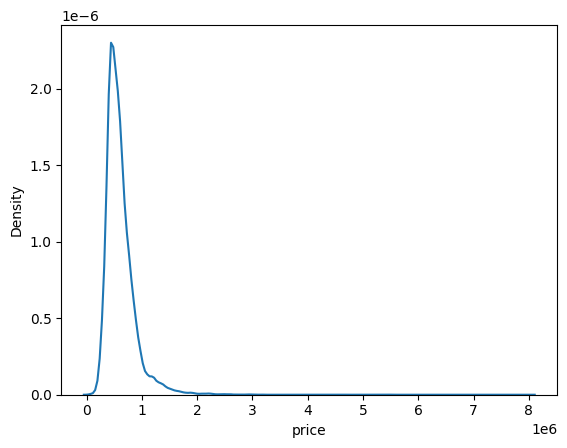

In [10]:
sns.kdeplot(data.price)

In [11]:
data['price_transformed'] = np.log(data['price'])

In [12]:
data.price_transformed.skew()

np.float64(0.4731646269984763)

In [13]:
list_2 = find_anomalies(data.price_transformed)

In [14]:
len(list_2)

266

### Plot the transformed data

<Axes: xlabel='price_transformed', ylabel='Density'>

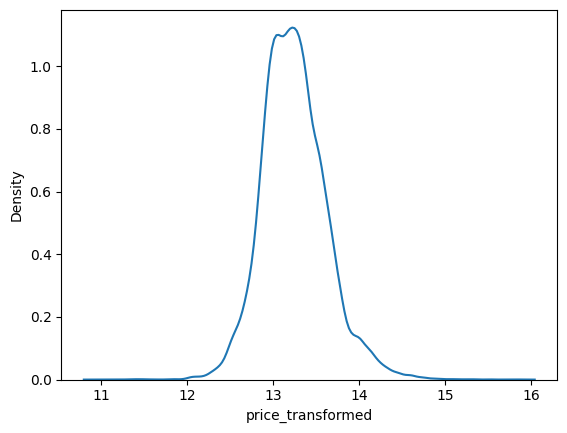

In [15]:
sns.kdeplot(data.price_transformed)

In [16]:
data['price_transformed_double'] = np.log(data['price_transformed'])

In [17]:
data['price_transformed_double'].skew()

np.float64(0.33092530655758573)

In [18]:
list_3 = find_anomalies(data.price_transformed_double)

In [19]:
len(list_3)

251

## Boxplots

Boxplots are useful for finding outliers because they visually represent the distribution of your data and clearly show potential outliers as individual points outside the "whiskers" of the box.

Here's a breakdown of what a boxplot shows:

1. The Box: The box itself represents the interquartile range (IQR), which contains the middle 50% of your data. The bottom of the box is the first quartile (Q1), and the top is the third quartile (Q3).
The Median: The line inside the box is the median (Q2), which is the middle value of your data.

2. The Whiskers: The lines extending from the box (the whiskers) typically reach up to 1.5 times the IQR from the edges of the box. These whiskers represent the range of data that is considered within the typical spread.

3. Outliers: Data points that fall outside the whiskers are considered potential outliers.
Because boxplots highlight these individual points beyond the whiskers, they provide a quick and easy way to visually identify data points that are significantly different from the rest of the dataset.

<Axes: >

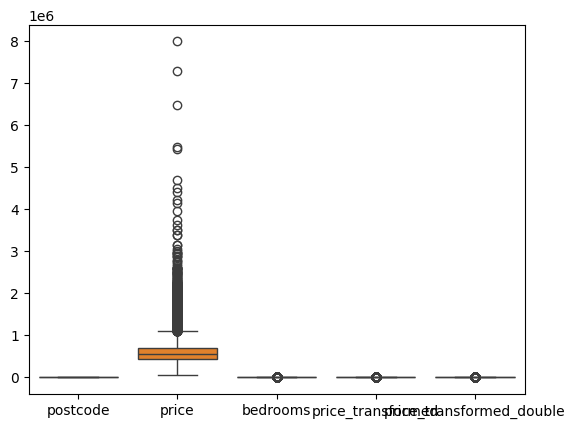

In [20]:
sns.boxplot(data=data)

In [21]:
df = pd.DataFrame(data)

In [22]:
len(df)

29580

In [23]:
df.describe()

,postcode,price,bedrooms,price_transformed,price_transformed_double
count,29580.000000,2.958000e+04,29580.000000,29580.000000,29580.000000
mean,2730.249730,6.097363e+05,3.250169,13.244695,2.583199
std,146.717292,2.817079e+05,0.951275,0.375214,0.028183
min,2600.000000,5.650000e+04,0.000000,10.941996,2.392608
25%,2607.000000,4.400000e+05,3.000000,12.994530,2.564529
50%,2615.000000,5.500000e+05,3.000000,13.217674,2.581555
75%,2905.000000,7.050000e+05,4.000000,13.465953,2.600165
max,2914.000000,8.000000e+06,5.000000,15.894952,2.766002


### IQR
IQR = Q3 - Q1

In [24]:
list1 = [43, 54, 56, 61, 62, 66, 69, 70, 71, 72, 77, 78, 79, 85, 88, 89, 93, 95, 96,98, 99, 99]

In [25]:
len(list1)

22

In [26]:
max(list1)

99

In [27]:
min(list1)

43

In [28]:
sorted(list1)

[43,
 54,
 56,
 61,
 62,
 66,
 69,
 70,
 71,
 72,
 77,
 78,
 79,
 85,
 88,
 89,
 93,
 95,
 96,
 98,
 99,
 99]

In [29]:
# calculate Q1, Q3
q1 = np.percentile(list1, 25)
q3 = np.percentile(list1, 75)

# calculate IQR
iqr = q3 - q1

print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")

Q1: 66.75
Q3: 92.0
IQR: 25.25
